# Determining the Value of K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv("train.csv", delimiter="|")

In [3]:
scaler = StandardScaler()
scaler.fit(df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
# X = np.array(df_train.loc[:,["trustLevel","scansWithoutRegistration","lineItemVoids","quantityModifications"]])
X = np.array(df_train.loc[:,["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration","quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition","fraud"]
])
y = np.array(df_train["fraud"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

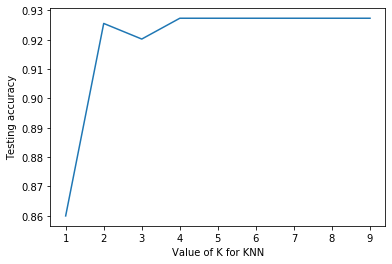

In [6]:
scores = []
K_Range = range(1,10)
for K in K_Range:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(K_Range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing accuracy")
plt.show()